### Introduction to the problem

An intensive intervention extending from hospital discharge to 36 months corrected age was administered between 1985 and 1988 at eight different sites. The study sample of infants was stratified by birth weight (2,000 grams or less, 2,001–2,500 grams) and randomized to the Intervention Group or the Follow-Up Group. The Intervention Group received home visits, attendance at a special child development center, and pediatric follow-up. The Follow-Up Group received only the pediatric follow-up component of the program. Measures of cognitive development, behavioral status, health status, and other variables were collected from both groups at predetermined time points…. The many other variables and indices in the data collection include site, pregnancy complications, child’s birth weight and gestation age, birth order, child’s gender, household composition, day care arrangements, source of health care, quality of the home environment, parents’ race and ethnicity, and maternal age, education, IQ, and employment. — from the HMCA archive.

In [1]:
import pandas as pd
import numpy as np

In [9]:
# read the data
data= pd.read_csv("https://raw.githubusercontent.com/AMLab-Amsterdam/CEVAE/master/datasets/IHDP/csv/ihdp_npci_1.csv",header=None)

In [10]:
data.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,1,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,0,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,0,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,0,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0
4,0,1.963538,6.202582,1.685048,6.191994,-1.045229,-0.602710,0.011465,0.161703,0.683672,...,1,1,1,1,0,0,0,0,0,0


### Prepare the data

In [14]:
col = ["treatment", "y_factual", "y_cfactual", "mu0", "mu1" ,]

In [18]:
for i in range(1,26):
    col.append("x"+str(i))

In [22]:
data.columns = col
data = data.astype({"treatment":"bool"},copy=False)

In [24]:
data.head(4)

,treatment,y_factual,y_cfactual,mu0,mu1,x1,x2,x3,x4,x5,...,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25
0,True,5.599916,4.318780,3.268256,6.854457,-0.528603,-0.343455,1.128554,0.161703,-0.316603,...,1,1,1,1,0,0,0,0,0,0
1,False,6.875856,7.856495,6.636059,7.562718,-1.736945,-1.802002,0.383828,2.244320,-0.629189,...,1,1,1,1,0,0,0,0,0,0
2,False,2.996273,6.633952,1.570536,6.121617,-0.807451,-0.202946,-0.360898,-0.879606,0.808706,...,1,0,1,1,0,0,0,0,0,0
3,False,1.366206,5.697239,1.244738,5.889125,0.390083,0.596582,-1.850350,-0.879606,-0.004017,...,1,0,1,1,0,0,0,0,0,0


### Understanding the data and the columns

Treatment here is the intervention. Y_factual is the outcome, quantified through the combination of the mental, behavioral, and health statuses of the infants

Confounders are variables that have a causal relationship with two variables that we want to test a causal relationship between. In the below example traffic jam is a confounder

 All the x’s (x1 to x25) are confounders of the outcome and the intervention: variables like gender, race, quality of home-care, etc
 
 We’re trying to figure out the causal relationship between the treatment and the outcome, while accounting for the confounders

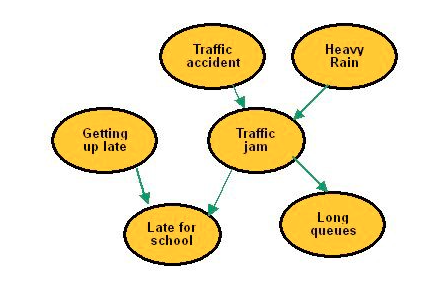

Technically we don’t have to account for these confounders because the data was collected through a randomized trial and any bias that would build up with them would be wiped out. However, it’s still a good idea to account for them, and it’s absolutely necessary to account for them when the data is observational

y_cfactual is a counterfactual, which is a question about something that didn’t happen, like “What would happen if I…?” In this case, it's a prediction as to what would happen if there was, or was not, an intervention (depending on the context). Counterfactuals are extremely important in causality because most of the times we aren’t always able to get all the data. For example, if we wanted to test the effectiveness of two different treatments on a single person, we would not be able to test both of them. Counterfactuals address the “imaginary” treatment that did not actually get administered, and we, as humans, use counterfactuals all the time (every time you imagine an alternate situation). If you’re more interested about them, read this great blog post |[https://www.inference.vc/causal-inference-3-counterfactuals/]

### How does Do Why work

DoWhy breaks down causal inference into four simple steps: model, identify, estimate, and refute. 

In [26]:
from dowhy import CausalModel
import dowhy

In [42]:
# Create a causal model from the data and given common causes.
xs = ""
for i in range(1,26):
    xs += ("x"+str(i)+"+")
xs =xs.rstrip('+')
model=CausalModel(
        data = data,
        treatment='treatment',
        outcome='y_factual',
        common_causes=xs.split('+')
        )

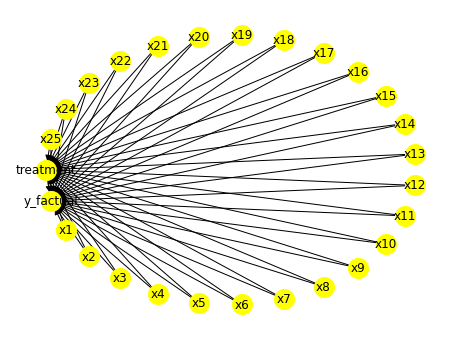

In [43]:
model.view_model()

The identify step uses the causal diagram created from the model step and identifies all the causal relationships. This code prints out:

In [44]:
#Identify the causal effect
identified_estimand = model.identify_effect()
print(identified_estimand)

Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                                                               
────────────(E[y_factual|x14,x7,x15,x18,x3,x23,x1,x12,x13,x2,x10,x8,x9,x16,x24,x4,x20,x25,x11,x22,x21,x6,x17,x19,x5])
d[treatment]                                                                                                         
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x14,x7,x15,x18,x3,x23,x1,x12,x13,x2,x10,x8,x9,x16,x24,x4,x20,x25,x11,x22,x21,x6,x17,x19,x5,U) = P(y_factual|treatment,x14,x7,x15,x18,x3,x23,x1,x12,x13,x2,x10,x8,x9,x16,x24,x4,x20,x25,x11,x22,x21,x6,x17,x19,x5)

### Estimand : 2
Estimand name: iv
No such variable(s) found!

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [45]:
# Estimate the causal effect and compare it with Average Treatment Effect
estimate = model.estimate_effect(identified_estimand, method_name="backdoor.linear_regression", test_significance=True)
print(estimate)
print("Causal Estimate is " + str(estimate.value))
data_1 = data[data["treatment"]==1]
data_0 = data[data["treatment"]==0]
print("ATE", np.mean(data_1["y_factual"])- np.mean(data_0["y_factual"]))

linear_regression
{'control_value': 0, 'treatment_value': 1, 'test_significance': True, 'evaluate_effect_strength': False, 'confidence_intervals': False, 'target_units': 'ate', 'effect_modifiers': []}
*** Causal Estimate ***

## Identified estimand
Estimand type: nonparametric-ate

### Estimand : 1
Estimand name: backdoor
Estimand expression:
     d                                                                                                               
────────────(E[y_factual|x14,x7,x15,x18,x3,x23,x1,x12,x13,x2,x10,x8,x9,x16,x24,x4,x20,x25,x11,x22,x21,x6,x17,x19,x5])
d[treatment]                                                                                                         
Estimand assumption 1, Unconfoundedness: If U→{treatment} and U→y_factual then P(y_factual|treatment,x14,x7,x15,x18,x3,x23,x1,x12,x13,x2,x10,x8,x9,x16,x24,x4,x20,x25,x11,x22,x21,x6,x17,x19,x5,U) = P(y_factual|treatment,x14,x7,x15,x18,x3,x23,x1,x12,x13,x2,x10,x8,x9,x16,x24,x4,x20,x25,x11,x22,x21,x6,x1